<a href="https://colab.research.google.com/github/snekumar/AD_cnn/blob/main/Random-XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pickle
import numpy as np
import shap

# Load the trained random forest model
with open('/content/drive/MyDrive/Colab Notebooks/featureext/random_forest_model.pickle', 'rb') as f:
    rf_model = pickle.load(f)

# Load the input data
input_dir = '/content/drive/MyDrive/Colab Notebooks/featureext'

# Load X_train_features
X_train_features = np.load(input_dir + 'X_train_features.npy')

# Load y_train_labels
y_train_labels = np.load(input_dir + 'y_train_labels.npy')

# Create a SHAP explainer using the random forest model and input data
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_features)


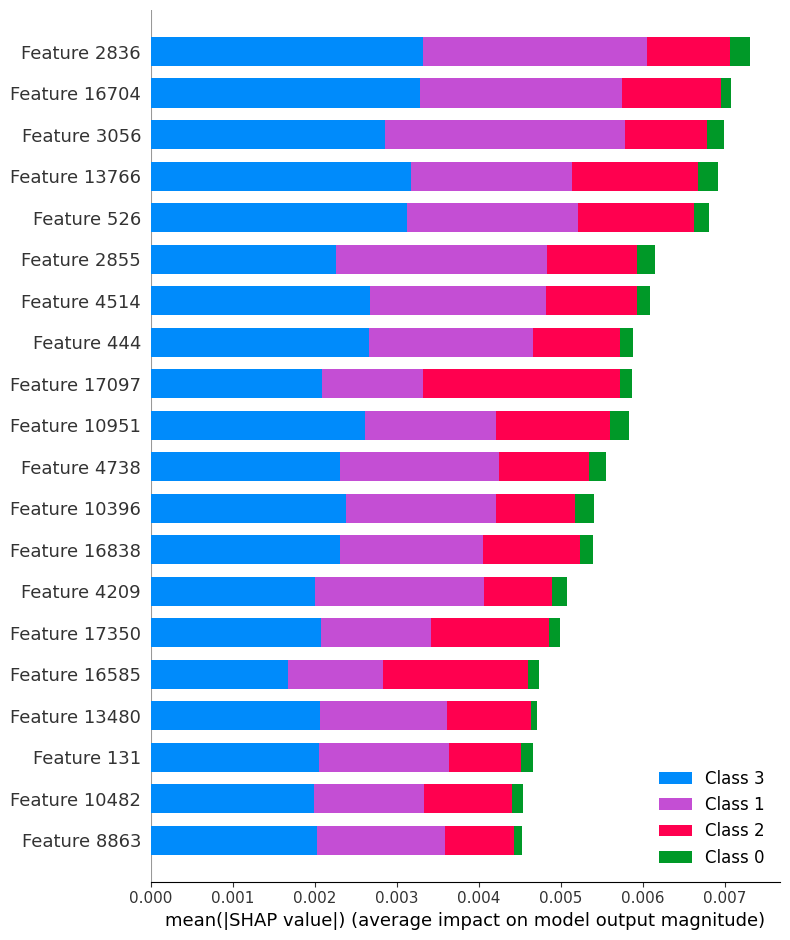

In [14]:
import shap

# Create a TreeExplainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train_features)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_train_features)

In [ ]:
output_index = 0  # Specify the index of the output

# Generate the force plot for the selected output
shap.force_plot(explainer.expected_value[output_index], shap_values[output_index], X_train_features)


shap.plots.force is slow for many thousands of rows, try subsampling your data.
